<a href="https://colab.research.google.com/github/daphnecor/advanced_machine_learning/blob/main/Adv_ML_exercise293.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Advanced Machine Learning exercise 29.13 (MK)
#### Importance sampling of one Gaussian with another

```
Students
Marnick Anten, Daphne Cornelisse, Menno Mulder (s1065637, s1066862, s1007033)
```

---


In [ ]:
# @title 0 dependencies and seeding
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import math
import seaborn as sns
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
sns.set_theme(style="darkgrid")
from matplotlib.collections import LineCollection

# seed the random generator (reproducability)
np.random.seed(4)

### 1 Construct importance sampling function

In [ ]:
def importance_sampling(Px, R, s_q, phi):
  '''
  Parameters
  ----------
  Px: pdf of the standard normal distribution

  R: sample size

  s_q: sampler density

  phi: function

  Returns
  -------

  Z_approx: the normalising constant for a 

  std_dev: standard deviation

  random_weight: one weight w_r

  '''
  np.random.seed(4)

  # setup Q*(x) where we want to sample from
  Qx = norm(loc=0, scale=s_q)

  # draw R samples from Q*(x)
  samples_q = Qx.rvs(size=R)

  # calculate the weights for each sample (wr = P*(x)/Q*(x))
  weights = Px.pdf(samples_q) / Qx.pdf(samples_q)

  # take 30 weights at specified indices
  weight_subset = weights[list(range(0,30))]

  # compute standard dev of the R weights 
  std_dev = np.std(weights)

  # compute estimated normalising constant Z (\int P*(x)dx)
  Z_approx = np.inner(weights, phi(samples_q)) / R

  return Z_approx, std_dev, weight_subset

### 2 Set parameters

In [ ]:
num_simulations = 1000 # number of iterations
Px = norm(loc=0, scale=1) # standard normal distribution Px
phi = lambda x: np.ones(x.shape)   # define function phi(x)
s_q_range = np.linspace(0.1, 1.6, num_simulations) # define range of sigma_q

# set sample sizes
R1 = 1000
R2 = 10**4
R3 = 10**5

### 3 Run importance sampling with different sample sizes $R$

In [ ]:
Z_range_R1 = np.zeros(num_simulations)
std_range_R1 = np.zeros(num_simulations)
rand_weight_subset = np.zeros((30, num_simulations))

for i, s_q in enumerate(s_q_range):
  Z_approx, std_dev, weight_subset = importance_sampling(Px, R1, s_q, phi)

  Z_range_R1[i] = Z_approx
  std_range_R1[i] = std_dev
  rand_weight_subset[:, i] = weight_subset

In [ ]:
Z_range_R2 = np.zeros(num_simulations)
std_range_R2 = np.zeros(num_simulations)

for i, s_q in enumerate(s_q_range):
  Z_approx, std_dev, _ = importance_sampling(Px, R2, s_q, phi)
  
  Z_range_R2[i] = Z_approx
  std_range_R2[i] = std_dev

In [ ]:
Z_range_R3 = np.zeros(num_simulations)
std_range_R3 = np.zeros(num_simulations)

for i, s_q in enumerate(s_q_range):
  Z_approx, std_dev, _ = importance_sampling(Px, R3, s_q, phi)
  
  Z_range_R3[i] = Z_approx
  std_range_R3[i] = std_dev

### 4 Plot results 

Reproducing results from MK Fig 29.20

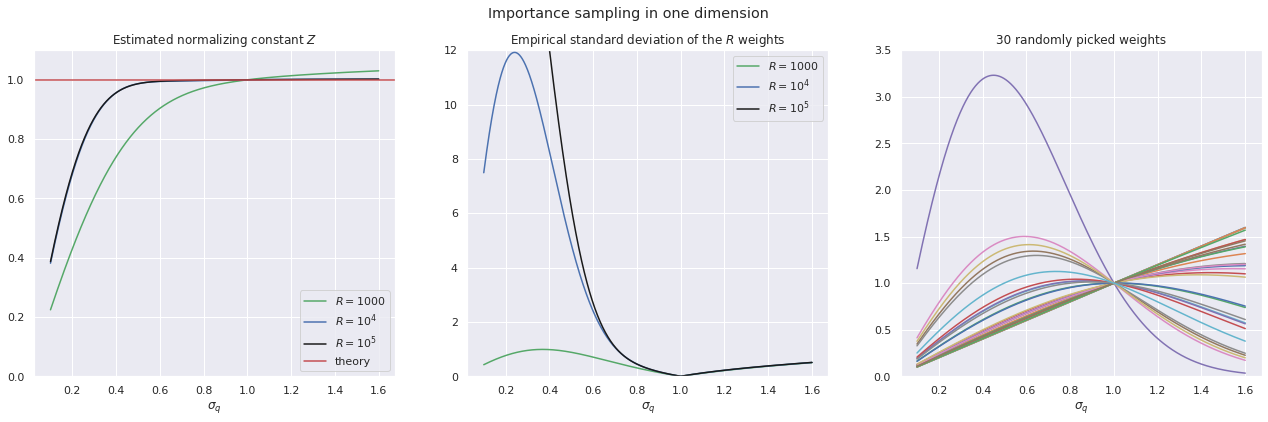

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Importance sampling in one dimension')

# Z
ax1.set_title('Estimated normalizing constant $Z$')
ax1.set_xlabel('$\sigma_q$')
ax1.plot(s_q_range, Z_range_R1, color='g', label='$R = 1000$');
ax1.plot(s_q_range, Z_range_R2, color='b', label='$R = 10^4$');
ax1.plot(s_q_range, Z_range_R3, color='k', label='$R = 10^5$');
ax1.axhline(y=1, color='r', linestyle='-', label='theory');
ax1.legend()
ax1.set_ylim(0, 1.1)
ax1.grid(True)

# std dev
ax2.set_title('Empirical standard deviation of the $R$ weights')
ax2.set_xlabel('$\sigma_q$')
ax2.plot(s_q_range, std_range_R1, color='g', label='$R = 1000$');
ax2.plot(s_q_range, std_range_R2, color='b', label='$R = 10^4$');
ax2.plot(s_q_range, std_range_R3, color='k', label='$R = 10^5$');
ax2.legend()
ax2.set_ylim(0, 12)
ax2.grid(True)

# weights w_r
ax3.set_title('30 randomly picked weights')
ax3.set_xlabel('$\sigma_q$')
for i in range(len(rand_weight_subset)):
    ax3.plot(s_q_range, rand_weight_subset[i, :])
ax3.set_ylim([0, 3.5])
ax3.grid(True)